In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml

In [8]:
import tensorflow.keras as keras

/usr/local/lib/python3.7/dist-packages/openml/datasets/functions.py:444: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  This is separate from the ipykernel package so we can avoid doing imports until


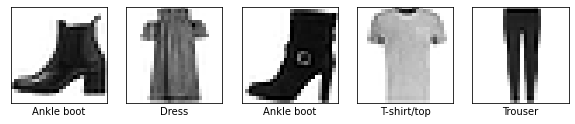

In [9]:
# Download FMINST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(40996)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(fmnist_classes[y[n]]))
plt.show();

In [10]:
X.shape

(70000, 28, 28)

In [10]:
##RESHAPING

In [11]:
X = X.reshape((70000, 28 * 28))

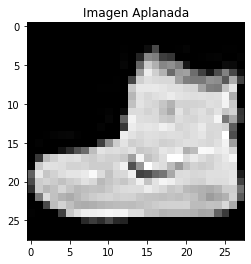

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que X es tu matriz de imágenes reconfigurada
# X = X.reshape((70000, 28 * 28))

# Selecciona una imagen de ejemplo para visualizar
imagen_ejemplo = X[0]  # Cambia el índice según la imagen que quieras visualizar

# Convierte el vector unidimensional nuevamente en una matriz bidimensional
imagen_bidimensional = imagen_ejemplo.reshape((28, 28))

# Visualiza la imagen bidimensional
plt.imshow(imagen_bidimensional, cmap='gray')  # cmap='gray' para imágenes en escala de grises
plt.title("Imagen Aplanada")
plt.show()


In [9]:
##REESCALADO

In [13]:
X = X.astype('float32') / 255

In [11]:
## FORMA DE ETIQUETA

In [14]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

X.shape, y.shape

((70000, 784), (70000, 10))

In [15]:
## TRAIN TEST 

In [16]:
# For Fashion MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

In [17]:
Xf_train, x_val, yf_train, y_val = train_test_split(X_train, y_train, train_size=50000, shuffle=True, stratify=y_train, random_state=0)

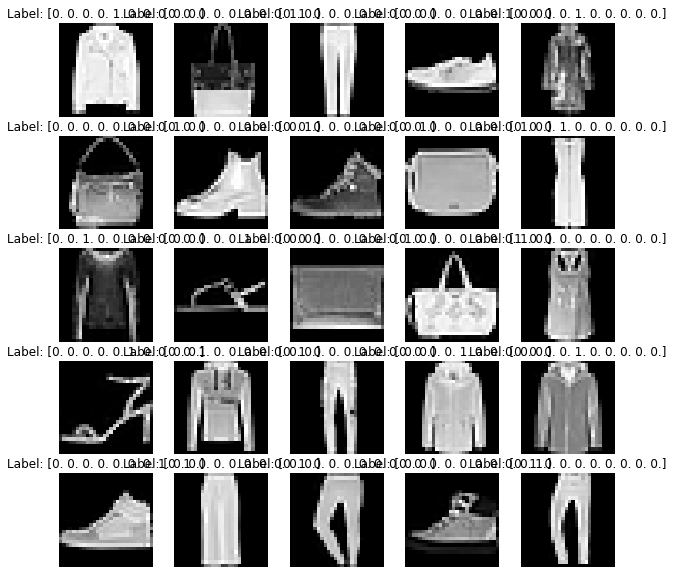

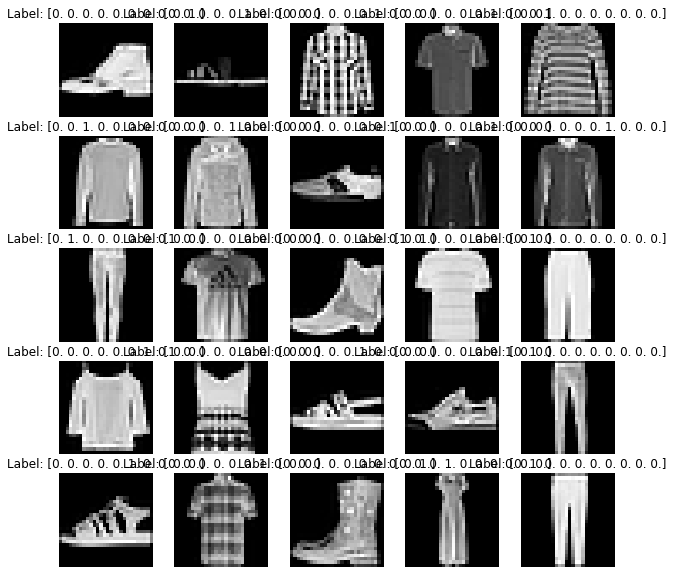

In [18]:
import matplotlib.pyplot as plt

# Redimensionar las imágenes a su forma original (28x28)
X_train_reshaped = X_train.reshape(-1, 28, 28)
X_test_reshaped = X_test.reshape(-1, 28, 28)

# Visualizar algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_reshaped[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Visualizar algunas imágenes del conjunto de prueba
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_reshaped[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.show()


In [19]:
##CREACION DE REDES SECUENCIALES

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))


In [21]:
## CAPA DE ENTRADA

In [22]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
## CAPA DE ACTIVACIÓN

In [24]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(512))
model.add(layers.ReLU(negative_slope=0.1)) # A leaky ReLU
model.add(layers.Dense(10, activation='softmax'))

In [25]:
## RESUMEN DEL MODELO

In [26]:
## Add one more hidden layer for better performance
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
## Elegir pérdida, optimizador, métricas

In [28]:
# Shorthand
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Detailed
model.compile(loss=CategoricalCrossentropy(label_smoothing=0.01),
              optimizer=RMSprop(learning_rate=0.001, momentum=0.0),
              metrics=[Accuracy()])

In [30]:
## ENTRENAMIENTO AJUSTE REPETIDO

In [31]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(28 * 28,)))
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [32]:
## SEGUIMIENTO DEL PROCESO

In [33]:
model = create_model()
history = model.fit(Xf_train, yf_train, epochs=3, batch_size=64);

Epoch 1/3
782/782 [==============================] - 7s 9ms/step - loss: 0.5236 - accuracy: 0.8096
Epoch 2/3
782/782 [==============================] - 7s 9ms/step - loss: 0.3782 - accuracy: 0.8610
Epoch 3/3
782/782 [==============================] - 7s 8ms/step - loss: 0.3422 - accuracy: 0.8756


In [34]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_9_input"}}, {"class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 784], "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "HeNormal", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_10", "trainable": true, "dtype": "float32", "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "HeNormal", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bia

In [35]:
## CONJUNTO DE VALIDACION

In [36]:
model = create_model()
history = model.fit(Xf_train, yf_train, epochs=3, batch_size=32, verbose=0,
                    validation_data=(x_val, y_val))


In [37]:
history.history

{'loss': [0.5074034929275513, 0.39848843216896057, 0.37373772263526917],
 'accuracy': [0.8159800171852112, 0.8588200211524963, 0.8682600259780884],
 'val_loss': [0.43525874614715576, 0.4328848719596863, 0.41471606492996216],
 'val_accuracy': [0.8361999988555908, 0.8450000286102295, 0.8657000064849854]}

In [38]:
##PREDICCIONES Y EVALUACIONES

313/313 [==============================] - 1s 3ms/step
[1.2722113e-15 1.1227103e-14 1.5114520e-14 5.7434628e-14 1.2840427e-14
 4.1289045e-08 4.0553130e-15 2.1095552e-07 4.8646775e-15 9.9999970e-01]


[]

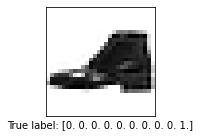

In [39]:
predictions = model.predict(X_test)

# Visualize one of the predictions
sample_id = 0
print(predictions[sample_id])

np.set_printoptions(precision=7)
fig, axes = plt.subplots(1, 1, figsize=(2, 2))
axes.imshow(X_test[sample_id].reshape(28, 28), cmap=plt.cm.gray_r)
axes.set_xlabel("True label: {}".format(y_test[sample_id]))
axes.set_xticks([])
axes.set_yticks([])

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.8592
Test accuracy: 0.8592000007629395


In [41]:
## COMPROBANDO AL CURVA DE APRENDIZAJE

In [42]:
from IPython.display import clear_output

# For plotting the learning curve in real time
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
        self.max_acc = 0
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.max_acc = max(self.max_acc, logs.get('val_accuracy'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure(figsize=(8,3))
            plt.plot(N, self.losses, lw=2, c="b", linestyle="-", label = "train_loss")
            plt.plot(N, self.acc, lw=2, c="r", linestyle="-", label = "train_acc")
            plt.plot(N, self.val_losses, lw=2, c="b", linestyle=":", label = "val_loss")
            plt.plot(N, self.val_acc, lw=2, c="r", linestyle=":", label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}, Max Acc {:.4f}]".format(epoch, self.max_acc))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()


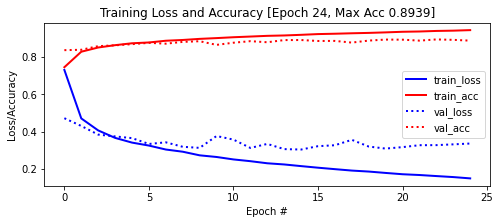

In [43]:
from sklearn.model_selection import train_test_split

plot_losses = TrainingPlot()
model = create_model()
history = model.fit(Xf_train, yf_train, epochs=25, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val), callbacks=[plot_losses])


In [44]:
## PARADA TEMPRANA

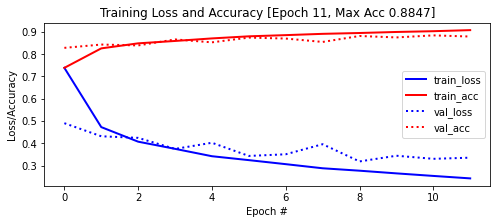

In [45]:
from tensorflow.keras import callbacks

earlystop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = create_model()
history = model.fit(Xf_train, yf_train, epochs=25, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val), callbacks=[plot_losses, earlystop])


In [47]:
##Regularización de peso (caída de peso)

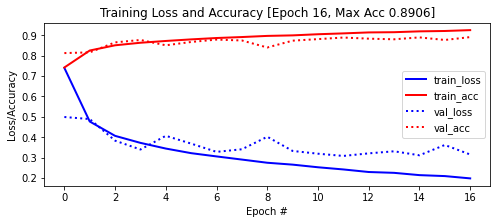

In [48]:
from tensorflow.keras import regularizers

earlystop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model = create_model()
history = model.fit(Xf_train, yf_train, epochs=50, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val), callbacks=[plot_losses, earlystop])


In [49]:
##  Dropout (deserción)

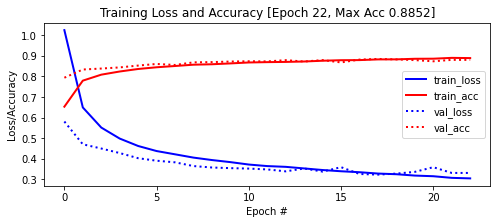

In [50]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
plot_losses = TrainingPlot()
history = model.fit(Xf_train, yf_train, epochs=50, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val), callbacks=[plot_losses, earlystop])


In [51]:
## Normalización por lotes

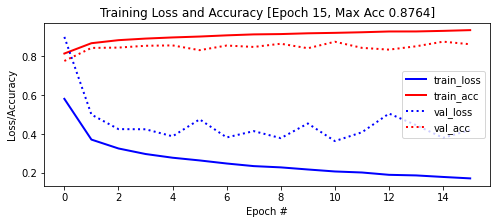

In [52]:
model = models.Sequential()
model.add(layers.Dense(265, activation='relu', input_shape=(28 * 28,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
plot_losses = TrainingPlot()
history = model.fit(Xf_train, yf_train, epochs=50, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val), callbacks=[plot_losses, earlystop])


In [53]:
## Combinación de múltiples regularizadores

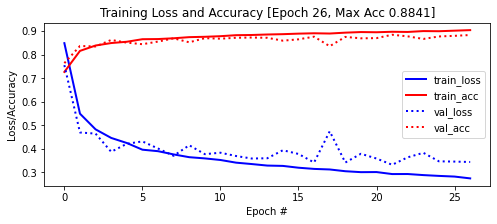

In [54]:
network = models.Sequential()
network.add(layers.Dense(265, activation='relu', input_shape=(28 * 28,)))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.3))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.3))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.3))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
plot_losses = TrainingPlot()
history = network.fit(Xf_train, yf_train, epochs=50, batch_size=512, verbose=0,
                      validation_data=(x_val, y_val), callbacks=[plot_losses, earlystop])
